1.0


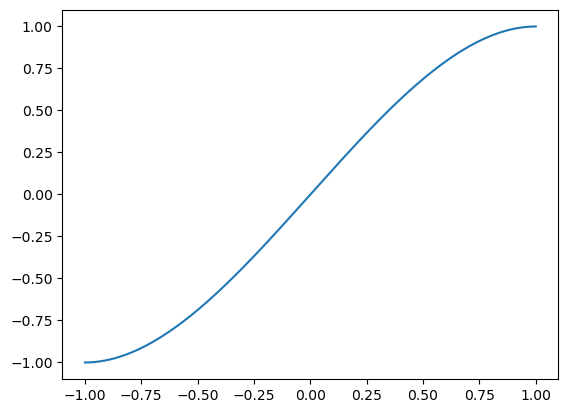

In [18]:

import matplotlib.pyplot  as plt
import math
import numpy as np

# aSOR
def f(x):
    # return x*(2 - x)
    return -0.5 * x**3 + 1.5 * x

print(f(1))

left = -1
right = 1
xx = [i/10000 * (right - left) + left for i in range(10000)]
# print(xx)
yy = [f(xxx) for xxx in xx]
# yy = [f(f(f(f(f(xxx))))) for xxx in xx]

plt.plot(xx, yy)
plt.show()

In [6]:
def sign(x, iters):
    for i in range(iters):
        x = f(x)
    return x

def sign_fast(x, K):
    for i in range(len(K)):
        x = f(K[i] * x)
    return x

print(sign(-0.25, 6))

K = [1.51, 1.28, 1.06, 1.01]
print(sign_fast(-0.5, K))

-0.999554759037920
-0.999853163954879


In [87]:
def relaxFactor(f, alpha, sigma_i, upper):
    """
    Calculate the relaxation factors for the adaptive successive over-relaxation (aSOR) method.

    Parameters:
    f (function): The function used in the iterative process.
    alpha (float): The precision parameter, determines the convergence criteria.
    sigma_i (float): The initial input range lower bound, typically a small positive number.

    Returns:
    list: A list of relaxation factors k_i.
    """
    epsilon_i = sigma_i
    K = []  # List to store the relaxation factors

    while 1 - epsilon_i > 2 ** (-alpha):
        # Define a helper function to compute the objective for argmax
        def objective(k):
            return min(f(k * epsilon_i), f(k))

        # Find the optimal k_i that maximizes the objective function
        # Note: This is a simplified approach; in practice, you might need a numerical optimization method
        # Here, we use a simple grid search for demonstration purposes
        from scipy.optimize import minimize_scalar
        # We minimize the negative of the objective function to find the maximum
        res = minimize_scalar(lambda k: -objective(k), bounds=(1, upper), method='bounded')
        k_i = res.x

        # Append the computed k_i to the list K
        K.append(k_i)

        # Update epsilon_i for the next iteration
        epsilon_i = f(k_i)

    return K



# Example usage:
if __name__ == "__main__":
    # Define the function f(z) = -1/2 * z^3 + 3/2 * z
    def f_sign(z):
        return -0.5 * z**3 + 1.5 * z

    alpha = 10  # Precision parameter
    sigma_i = 0  # Initial input range lower bound

    K_sign = relaxFactor(f_sign, alpha, sigma_i, 2)
    print("Relaxation factors:", K_sign)


    def sign(x, iters):
        for i in range(iters):
            x = f_sign(x)
        return x

    def sign_fast(x, K):
        for i in range(len(K)):
            x = f_sign(K[i] * x)
        return x

    input = 0.6

    print(sign(input, 6))

    # K_sign = [1.38197046028712, 1.1369694482754693, 1.0148934414928128]
    print(sign_fast(input, K_sign))

Relaxation factors: [1.38197046028712, 1.1369694482754693, 1.0148934414928128]
0.9999999999999999
0.9999928589826494


In [66]:
def f_inv(z):
    return z * (2 - z)
def inverse(x, K):
    a = x
    b = 1

    for ki in K:
        b = ki * b * (2 - ki*a)
        a = ki * a * (2 - ki*a)
    return b

K_inv = relaxFactor(f_inv, alpha, sigma_i, 4)
print(K_inv)

xx = 0.8

# 1 / x
print(inverse(xx, K_inv))
print(1 / xx)

[1.708209458521407, 1.3347202619383138, 1.0593437148393925, 1.0017626264306325]
1.2499995192716233
1.25


In [ ]:
def f_sqrt_inv(z):
    return z*(3 - z)**2 / 4
def sqrt_inverse(x, K):
    a = x
    b = 1

    for ki in K:
        b = ki**0.5 * b * (3 - ki*a) / 2
        a = ki * a * (3 - ki*a)**2 / 4
    return b

K_inv = relaxFactor(f_inv, alpha, sigma_i, 4)
print(K_inv)

xx = 0.4
# 1 / \sqrt(x)
print(sqrt_inverse(xx, K_inv))
print(1/(xx**0.5))

# \sqrt(x)
print(sqrt_inverse(xx, K_inv) * xx)
print(xx**0.5)

[1.708209458521407, 1.3347202619383138, 1.0593437148393925, 1.0017626264306325]
1.5811376956756085
1.5811388300841895
0.6324550782702434
0.6324555320336759


In [86]:
# x ** -(1/m)
m = 1
def f_pow_m_inv(z):
    return z*((m+1) - z**m) / m
def pow_m_inv(x, K):
    y = 1

    for ki in K:
        y = ki*y*((m+1) - x*(ki*y)**m) / m
    return y

K_inv = relaxFactor(f_pow_m_inv, 8, sigma_i, 4)
print(K_inv)

xx = 0.4
# x ** -(1/m)
print(pow_m_inv(xx, K_inv))
print(1/(xx**(1/m)))


[1.708209458521407, 1.3347202619383138, 1.0593437148393925]
2.4993098415356574
2.5


In [1]:
acc = 0
for i in range(64):
    acc += i
print(acc)

2016
